In [1]:
%matplotlib inline
import pandas as pd


In [2]:
filepath = "/06-text-analysis-2/NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head()


emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


In [3]:
import glob

filenames = glob.glob("tolkien/*.txt")
filenames


['tolkien/Hobbit, The - J. R. R. Tolkien - 1960.txt',
 'tolkien/Lord of the Rings - 01 - The Fellowship of the Ring - J. R. R. Tolkien - 1955.txt',
 'tolkien/Lord of the Rings - 02 - The Two Towers - J. R. R. Tolkien - 1965.txt',
 'tolkien/Lord of the Rings - 03 - The Return of the King - J. R. R. Tolkien - 1965.txt']

In [4]:
Tolkien = [open(filename).read() for filename in filenames]
len(Tolkien)


4

In [5]:
Tolkien_df = pd.DataFrame({
    'text': Tolkien,
    'filename': filenames
})
Tolkien_df


,filename,text
0,"tolkien/Hobbit, The - J. R. R. Tolkien - 1960.txt",THE HOBBIT\n\nOR\n\nTHERE AND BACK AGAIN\n\nBY...
1,tolkien/Lord of the Rings - 01 - The Fellowshi...,THE FELLOWSHIP OF THE RING\n\n\n\n\nBEING THE ...
2,tolkien/Lord of the Rings - 02 - The Two Tower...,THE TWO TOWERS\n\n\nBEING THE SECOND PART OF\n...
3,tolkien/Lord of the Rings - 03 - The Return of...,THE RETURN\n\nOF THE KING\n\n\n\n\nBEING THE T...


In [6]:
Tolkien_df['name'] = Tolkien_df['text'].apply(lambda value: value.split("\n")[0])
# speeches_df['content'] = speeches_df['text'].apply(lambda value: value.split("\n")[-1])
Tolkien_df


,filename,text,name
0,"tolkien/Hobbit, The - J. R. R. Tolkien - 1960.txt",THE HOBBIT\n\nOR\n\nTHERE AND BACK AGAIN\n\nBY...,THE HOBBIT
1,tolkien/Lord of the Rings - 01 - The Fellowshi...,THE FELLOWSHIP OF THE RING\n\n\n\n\nBEING THE ...,THE FELLOWSHIP OF THE RING
2,tolkien/Lord of the Rings - 02 - The Two Tower...,THE TWO TOWERS\n\n\nBEING THE SECOND PART OF\n...,THE TWO TOWERS
3,tolkien/Lord of the Rings - 03 - The Return of...,THE RETURN\n\nOF THE KING\n\n\n\n\nBEING THE T...,THE RETURN


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(Tolkien_df['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df


,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.000049,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000074,0.000124,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000093,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000024,0.0,0.000049,0.000098,0.000024,0.000024,0.0,0.0,0.0,0.000024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
angry_words = emolex_df[emolex_df.anger == 1]['word']
# angry_words.head()
Tolkien_df['anger'] = wordcount_df[angry_words].sum(axis=1)
Tolkien_df


,filename,text,name,anger
0,"tolkien/Hobbit, The - J. R. R. Tolkien - 1960.txt",THE HOBBIT\n\nOR\n\nTHERE AND BACK AGAIN\n\nBY...,THE HOBBIT,0.069777
1,tolkien/Lord of the Rings - 01 - The Fellowshi...,THE FELLOWSHIP OF THE RING\n\n\n\n\nBEING THE ...,THE FELLOWSHIP OF THE RING,0.060054
2,tolkien/Lord of the Rings - 02 - The Two Tower...,THE TWO TOWERS\n\n\nBEING THE SECOND PART OF\n...,THE TWO TOWERS,0.078584
3,tolkien/Lord of the Rings - 03 - The Return of...,THE RETURN\n\nOF THE KING\n\n\n\n\nBEING THE T...,THE RETURN,0.081672


In [11]:
anticipation_words = emolex_df[emolex_df.anticipation == 1]['word']
# anticipation_words.head()
Tolkien_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
Tolkien_df


,filename,text,name,anger,anticipation
0,"tolkien/Hobbit, The - J. R. R. Tolkien - 1960.txt",THE HOBBIT\n\nOR\n\nTHERE AND BACK AGAIN\n\nBY...,THE HOBBIT,0.069777,0.124102
1,tolkien/Lord of the Rings - 01 - The Fellowshi...,THE FELLOWSHIP OF THE RING\n\n\n\n\nBEING THE ...,THE FELLOWSHIP OF THE RING,0.060054,0.107930
2,tolkien/Lord of the Rings - 02 - The Two Tower...,THE TWO TOWERS\n\n\nBEING THE SECOND PART OF\n...,THE TWO TOWERS,0.078584,0.104686
3,tolkien/Lord of the Rings - 03 - The Return of...,THE RETURN\n\nOF THE KING\n\n\n\n\nBEING THE T...,THE RETURN,0.081672,0.099433


In [12]:
disgust_words = emolex_df[emolex_df.disgust == 1]['word']
# disgust_words.head()
Tolkien_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)
Tolkien_df


,filename,text,name,anger,anticipation,disgust
0,"tolkien/Hobbit, The - J. R. R. Tolkien - 1960.txt",THE HOBBIT\n\nOR\n\nTHERE AND BACK AGAIN\n\nBY...,THE HOBBIT,0.069777,0.124102,0.052160
1,tolkien/Lord of the Rings - 01 - The Fellowshi...,THE FELLOWSHIP OF THE RING\n\n\n\n\nBEING THE ...,THE FELLOWSHIP OF THE RING,0.060054,0.107930,0.038365
2,tolkien/Lord of the Rings - 02 - The Two Tower...,THE TWO TOWERS\n\n\nBEING THE SECOND PART OF\n...,THE TWO TOWERS,0.078584,0.104686,0.051370
3,tolkien/Lord of the Rings - 03 - The Return of...,THE RETURN\n\nOF THE KING\n\n\n\n\nBEING THE T...,THE RETURN,0.081672,0.099433,0.050645


In [14]:
fear_words = emolex_df[emolex_df.fear == 1]['word']
# fear_words.head()
Tolkien_df['fear'] = wordcount_df[fear_words].sum(axis=1)

joy_words = emolex_df[emolex_df.joy == 1]['word']
# joy_words.head()
Tolkien_df['joy'] = wordcount_df[joy_words].sum(axis=1)

negative_words = emolex_df[emolex_df.negative == 1]['word']
# negative_words.head()
Tolkien_df['negative'] = wordcount_df[negative_words].sum(axis=1)

positive_words = emolex_df[emolex_df.positive == 1]['word']
# positive_words.head()
Tolkien_df['positive'] = wordcount_df[positive_words].sum(axis=1)

sadness_words = emolex_df[emolex_df.sadness == 1]['word']
# sadness_words.head()
Tolkien_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

surprise_words = emolex_df[emolex_df.surprise == 1]['word']
# surprise_words.head()
Tolkien_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

trust_words = emolex_df[emolex_df.trust == 1]['word']
# trust_words.head()
Tolkien_df['trust'] = wordcount_df[trust_words].sum(axis=1)

Tolkien_df


,filename,text,name,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,"tolkien/Hobbit, The - J. R. R. Tolkien - 1960.txt",THE HOBBIT\n\nOR\n\nTHERE AND BACK AGAIN\n\nBY...,THE HOBBIT,0.069777,0.124102,0.052160,0.097628,0.080652,0.161647,0.182019,0.081537,0.066381,0.105944
1,tolkien/Lord of the Rings - 01 - The Fellowshi...,THE FELLOWSHIP OF THE RING\n\n\n\n\nBEING THE ...,THE FELLOWSHIP OF THE RING,0.060054,0.107930,0.038365,0.086561,0.082559,0.151383,0.185993,0.081917,0.056472,0.109659
2,tolkien/Lord of the Rings - 02 - The Two Tower...,THE TWO TOWERS\n\n\nBEING THE SECOND PART OF\n...,THE TWO TOWERS,0.078584,0.104686,0.051370,0.105458,0.074785,0.183332,0.182992,0.090940,0.056652,0.104532
3,tolkien/Lord of the Rings - 03 - The Return of...,THE RETURN\n\nOF THE KING\n\n\n\n\nBEING THE T...,THE RETURN,0.081672,0.099433,0.050645,0.105516,0.074660,0.181227,0.197034,0.091518,0.044269,0.108937


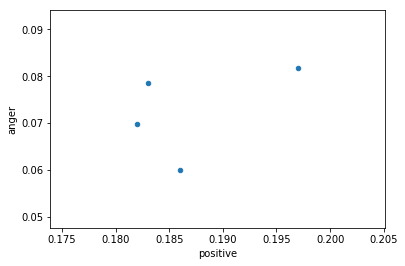

In [16]:
Tolkien_df.plot(x='positive', y='anger', kind='scatter')


In [ ]:
# Is there a way to visualize all of the words at once? Is there something called principal component analysis?
